In [47]:
sc.stop()
from pyspark import SparkConf, SparkContext
from operator import add
import numpy as np
import math
import sys

sc = SparkContext()

data_file = sc.textFile(r"data.txt")
centroid_file = sc.textFile(r"c1.txt")

def parsePoints(x):
    return np.array([float(e) for e in x.split(' ')])

def findClosetCentroid(point, centroids):
    
    min_dis = sys.float_info.max
    min_id = -1
    for i in range(len(centroids)):
        dis = numpy.linalg.norm(point - centroids[i]) #Euclidean distance
        if dis < min_dis:
            min_dis = dis
            min_id = i+1
    
    return (min_id, (math.pow(min_dis, 2), point, 1))        
    
data_points = data_file.map(lambda x: parsePoints(x)).cache()
centroids = centroid_file.map(lambda x: parsePoints(x)).collect()
distance_c1 = []
for i in range(20):
    closest = data_points.map(lambda x: findClosetCentroid(x, centroids))
    new_centroids = closest.reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1], x[2]+y[2]))\
                        .map(lambda x: (x[0], (x[1][0], x[1][1]/x[1][2]))).collect()

    distance = sum(d for (c, (d,p)) in new_centroids)
    print(distance)
    distance_c1.append(distance)
    for (c, (d,p)) in new_centroids:
        centroids[c-1] = p

623660345.3064111
509862908.297545
485480681.872008
463997011.6850126
460969266.57299656
460537847.9827681
460313099.6535454
460003523.88940746
459570539.31773514
459021103.3422911
458490656.191981
457944232.58797437
457558005.19867694
457290136.3523022
457050555.05956286
456892235.615355
456703630.73703384
456404203.01897496
456177800.5419934
455986871.02734596


In [48]:
data_file = sc.textFile(r"data.txt")
centroid_file = sc.textFile(r"c2.txt")

def parsePoints(x):
    return np.array([float(e) for e in x.split(' ')])

def findClosetCentroid(point, centroids):
    
    min_dis = sys.float_info.max
    min_id = -1
    for i in range(len(centroids)):
        dis = numpy.linalg.norm(point - centroids[i]) #Euclidean distance
        if dis < min_dis:
            min_dis = dis
            min_id = i+1
    
    return (min_id, (math.pow(min_dis, 2), point, 1))        
    
data_points = data_file.map(lambda x: parsePoints(x)).cache()
centroids = centroid_file.map(lambda x: parsePoints(x)).collect()
distance_c2 = []
for i in range(20):
    closest = data_points.map(lambda x: findClosetCentroid(x, centroids))
    new_centroids = closest.reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1], x[2]+y[2]))\
                        .map(lambda x: (x[0], (x[1][0], x[1][1]/x[1][2]))).collect()

    distance = sum(d for (c, (d,p)) in new_centroids)
    print(distance)
    distance_c2.append(distance)
    for (c, (d,p)) in new_centroids:
        centroids[c-1] = p

438747790.0279171
249803933.62600327
194494814.40631258
169804841.45154303
156295748.80627608
149094208.10896617
142508531.61961526
132303869.40652977
117170969.83719069
108547377.17857003
102237203.317996
98278015.74975675
95630226.12177394
93793314.051193
92377131.96821071
91541606.25423889
91045573.83042462
90752240.101408
90470170.18122734
90216416.17563123


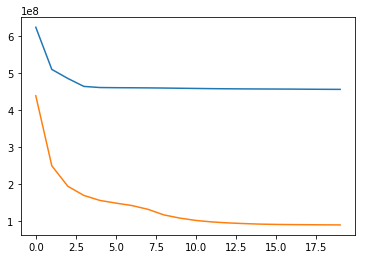

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(distance_c1)
plt.plot(distance_c2)